<a href="https://colab.research.google.com/github/rybak97/SR_cartoon/blob/main/train_Tom%26Jerry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, Input, Conv2DTranspose, Activation, MaxPooling2D

from scipy import signal
from scipy import ndimage

from matplotlib import pyplot as plt

import math

import cv2 as cv
import numpy as np

import os
from PIL import Image

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import PiecewiseConstantDecay
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

import gc
gc.collect

<function gc.collect>

In [2]:
def residual_block_gen(ch=64,k_s=3,st=1):
    model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(ch,k_s,strides=(st,st),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Conv2D(ch,k_s,strides=(st,st),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),])
    return model

def Upsample_block(x,ch=256, k_s=3, st=1):
    x = tf.keras.layers.Conv2D(ch,k_s, strides=(st,st), padding='same')(x)
    x = tf.nn.depth_to_space(x, 2) # Subpixel pixelshuffler
    x = tf.keras.layers.LeakyReLU()(x)
    return x
lr=tf.keras.layers.Input(shape=(None, None, 3))
input_conv=tf.keras.layers.Conv2D(64,9,padding='same')(lr)
input_conv=tf.keras.layers.LeakyReLU()(input_conv)



In [ ]:
def model():
    SRRes=input_conv
    for x in range(5):
        res_output=residual_block_gen()(SRRes)
        SRRes=Upsample_block(SRRes)
        SRRes=MaxPooling2D()(SRRes)
        SRRes=tf.keras.layers.Add()([SRRes,res_output])
        SRRes=tf.keras.layers.Conv2D(64,9,padding='same')(SRRes)
    SRRes=tf.keras.layers.BatchNormalization()(SRRes)
    SRRes=tf.keras.layers.Add()([SRRes,input_conv])
    SRRes=Upsample_block(SRRes)
    SRRes=MaxPooling2D()(SRRes)



    output_sr=tf.keras.layers.Conv2D(3,9,activation='sigmoid',padding='same')(SRRes)
    return tf.keras.models.Model(lr,output_sr)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
images = []
i=0

for file in os.listdir('/content/drive/MyDrive/Tom&Jerry/Tom_1000/'):
    images.append(cv.imread('/content/drive/MyDrive/Tom&Jerry/Tom_1000/{}'.format(file)))


In [ ]:
import gc
gc.collect

<function gc.collect>

In [ ]:
for a in range(len(images)):
  images[a] = cv.cvtColor(images[a], cv.COLOR_BGR2RGB)

gc.collect

<function gc.collect>

In [ ]:
len(images)

1000

In [ ]:
set_Y = []
set_X = []


set_Y = np.array([cv.resize(i,(320,240)) for i in images]) / 255.

        
gc.collect


<function gc.collect>

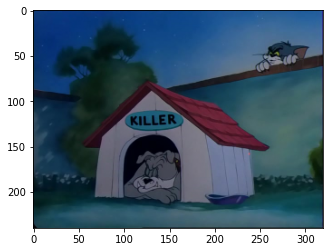

In [ ]:
plt.imshow(set_Y[17])

In [ ]:
for a in range(len(images)):
  images[a] = cv.resize(images[a], (80,60),interpolation=cv.INTER_LINEAR)
gc.collect

<function gc.collect>

In [ ]:
set_X  = np.array([cv.resize(i,(320,240), interpolation=cv.INTER_NEAREST) for i in images]) / 255.
gc.collect


<function gc.collect>

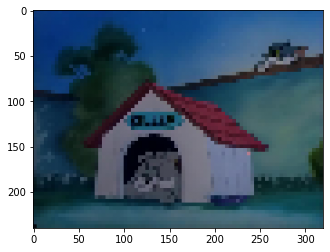

In [ ]:
plt.imshow(set_X[17])

In [ ]:
X_train = set_X[0:800]
X_test  = set_X[800:]


y_train = set_Y[0:800]
y_test  = set_Y[800:]
gc.collect


<function gc.collect>

In [ ]:
model = model()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0002),
              loss='mse',       
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=1,
                    validation_split=0.2)

test_scores = model.evaluate(X_test, y_test, verbose=2) 

print('Test loss:', test_scores[0])
print('Test mae:', test_scores[1])

model.save('EDSR_Tom&Jerry.h5')


160/160 [==============================] - 667s 4s/step - loss: 0.0189 - mae: 0.1040 - val_loss: 0.0215 - val_mae: 0.1204
7/7 - 62s - loss: 0.0218 - mae: 0.1220 - 62s/epoch - 9s/step
Test loss: 0.021785687655210495
Test mae: 0.12197313457727432


In [ ]:
images = []
set_Y = []
set_X = []
X_train = []
X_test  = []


y_train = []
y_test  = []
gc.collect

i=0

for file in os.listdir('/content/drive/MyDrive/Tom&Jerry/Tom_2000/'):
    images.append(cv.imread('/content/drive/MyDrive/Tom&Jerry/Tom_2000/{}'.format(file)))

In [ ]:
for a in range(len(images)):
  images[a] = cv.cvtColor(images[a], cv.COLOR_BGR2RGB)

gc.collect

<function gc.collect>

In [ ]:
set_Y = np.array([cv.resize(i,(320,240)) for i in images]) / 255.

        
gc.collect


<function gc.collect>

In [ ]:
for a in range(len(images)):
  images[a] = cv.resize(images[a], (80,60),interpolation=cv.INTER_LINEAR)
gc.collect

<function gc.collect>

In [ ]:
set_X  = np.array([cv.resize(i,(320,240), interpolation=cv.INTER_NEAREST) for i in images]) / 255.
gc.collect


<function gc.collect>

In [ ]:
X_train = set_X[0:800]
X_test  = set_X[800:]


y_train = set_Y[0:800]
y_test  = set_Y[800:]
gc.collect

<function gc.collect>

In [ ]:
model = keras.models.load_model('/content/EDSR_Tom&Jerry.h5')

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0002),
              loss='mse',       
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=1,
                    validation_split=0.2)

test_scores = model.evaluate(X_test, y_test, verbose=2) 

print('Test loss:', test_scores[0])
print('Test mae:', test_scores[1])

model.save('EDSR_Tom&Jerry_2.h5')

160/160 [==============================] - 662s 4s/step - loss: 0.0137 - mae: 0.0874 - val_loss: 0.0502 - val_mae: 0.2036
7/7 - 39s - loss: 0.0458 - mae: 0.1927 - 39s/epoch - 6s/step
Test loss: 0.04576455056667328
Test mae: 0.1926606148481369


In [ ]:
images = []
set_Y = []
set_X = []
X_train = []
X_test  = []


y_train = []
y_test  = []
gc.collect

<function gc.collect>

In [ ]:
i=0

for file in os.listdir('/content/drive/MyDrive/Tom&Jerry/Tom_3000/'):
    images.append(cv.imread('/content/drive/MyDrive/Tom&Jerry/Tom_3000/{}'.format(file)))

In [ ]:
for a in range(len(images)):
  images[a] = cv.cvtColor(images[a], cv.COLOR_BGR2RGB)

gc.collect

<function gc.collect>

In [ ]:
set_Y = np.array([cv.resize(i,(320,240)) for i in images]) / 255.

        
gc.collect

<function gc.collect>

In [ ]:
for a in range(len(images)):
  images[a] = cv.resize(images[a], (80,60),interpolation=cv.INTER_LINEAR)
gc.collect

<function gc.collect>

In [ ]:
set_X  = np.array([cv.resize(i,(320,240), interpolation=cv.INTER_NEAREST) for i in images]) / 255.
gc.collect

<function gc.collect>

In [ ]:
X_train = set_X[0:800]
X_test  = set_X[800:]


y_train = set_Y[0:800]
y_test  = set_Y[800:]
gc.collect

<function gc.collect>

In [ ]:
model = keras.models.load_model('/content/EDSR_Tom&Jerry_2.h5')

model.compile(optimizer=tf.keras.optimizers.Adam(0.0002),
              loss='mse',       
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=1,
                    validation_split=0.2)

test_scores = model.evaluate(X_test, y_test, verbose=2) 

print('Test loss:', test_scores[0])
print('Test mae:', test_scores[1])

model.save('EDSR_Tom&Jerry_3.h5')

160/160 [==============================] - 708s 4s/step - loss: 0.0095 - mae: 0.0723 - val_loss: 0.0221 - val_mae: 0.1322
7/7 - 62s - loss: 0.0184 - mae: 0.1206 - 62s/epoch - 9s/step
Test loss: 0.018392177298665047
Test mae: 0.12061059474945068


In [ ]:
images = []
set_Y = []
set_X = []
X_train = []
X_test  = []


y_train = []
y_test  = []
gc.collect

<function gc.collect>

In [ ]:
i=0

for file in os.listdir('/content/drive/MyDrive/Tom&Jerry/Tom_4000/'):
    images.append(cv.imread('/content/drive/MyDrive/Tom&Jerry/Tom_4000/{}'.format(file)))

In [ ]:
for a in range(len(images)):
  images[a] = cv.cvtColor(images[a], cv.COLOR_BGR2RGB)

gc.collect

<function gc.collect>

In [ ]:
set_Y = np.array([cv.resize(i,(320,240)) for i in images]) / 255.

        
gc.collect

<function gc.collect>

In [ ]:
for a in range(len(images)):
  images[a] = cv.resize(images[a], (80,60),interpolation=cv.INTER_LINEAR)
gc.collect

<function gc.collect>

In [ ]:
set_X  = np.array([cv.resize(i,(320,240), interpolation=cv.INTER_NEAREST) for i in images]) / 255.
gc.collect

<function gc.collect>

In [ ]:
X_train = set_X[0:800]
X_test  = set_X[800:]


y_train = set_Y[0:800]
y_test  = set_Y[800:]
gc.collect

<function gc.collect>

In [ ]:
model = keras.models.load_model('/content/EDSR_Tom&Jerry_3.h5')

model.compile(optimizer=tf.keras.optimizers.Adam(0.0002),
              loss='mse',       
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=1,
                    validation_split=0.2)

test_scores = model.evaluate(X_test, y_test, verbose=2) 

print('Test loss:', test_scores[0])
print('Test mae:', test_scores[1])

model.save('EDSR_Tom&Jerry_4.h5')

160/160 [==============================] - 660s 4s/step - loss: 0.0089 - mae: 0.0688 - val_loss: 0.0127 - val_mae: 0.0849


ResourceExhaustedError: ignored

In [ ]:
images = []
set_Y = []
set_X = []
X_train = []
X_test  = []


y_train = []
y_test  = []
gc.collect

<function gc.collect>

In [ ]:
i=0

for file in os.listdir('/content/drive/MyDrive/Tom&Jerry/Tom_5000/'):
    images.append(cv.imread('/content/drive/MyDrive/Tom&Jerry/Tom_5000/{}'.format(file)))

In [ ]:
for a in range(len(images)):
  images[a] = cv.cvtColor(images[a], cv.COLOR_BGR2RGB)

gc.collect

<function gc.collect>

In [ ]:
set_Y = np.array([cv.resize(i,(320,240)) for i in images]) / 255.

        
gc.collect

<function gc.collect>

In [ ]:
for a in range(len(images)):
  images[a] = cv.resize(images[a], (80,60),interpolation=cv.INTER_LINEAR)
gc.collect

<function gc.collect>

In [ ]:
set_X  = np.array([cv.resize(i,(320,240), interpolation=cv.INTER_NEAREST) for i in images]) / 255.
gc.collect

<function gc.collect>

In [ ]:
X_train = set_X[0:800]
X_test  = set_X[800:]


y_train = set_Y[0:800]
y_test  = set_Y[800:]
gc.collect

<function gc.collect>

In [ ]:
model = keras.models.load_model('/content/EDSR_Tom&Jerry_4.h5')

model.compile(optimizer=tf.keras.optimizers.Adam(0.0002),
              loss='mse',       
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=1,
                    validation_split=0.2)

test_scores = model.evaluate(X_test, y_test, verbose=2) 

print('Test loss:', test_scores[0])
print('Test mae:', test_scores[1])

model.save('EDSR_Tom&Jerry_5.h5')

160/160 [==============================] - 711s 4s/step - loss: 0.0074 - mae: 0.0620 - val_loss: 0.0196 - val_mae: 0.1157
7/7 - 62s - loss: 0.0201 - mae: 0.1137 - 62s/epoch - 9s/step
Test loss: 0.020094605162739754
Test mae: 0.11370263993740082


In [ ]:
images = []
set_Y = []
set_X = []
X_train = []
X_test  = []


y_train = []
y_test  = []
gc.collect

<function gc.collect>

In [ ]:
i=0

for file in os.listdir('/content/drive/MyDrive/Tom&Jerry/Tom_6000/'):
    images.append(cv.imread('/content/drive/MyDrive/Tom&Jerry/Tom_6000/{}'.format(file)))

In [ ]:
for a in range(len(images)):
  images[a] = cv.cvtColor(images[a], cv.COLOR_BGR2RGB)

gc.collect

<function gc.collect>

In [ ]:
set_Y = np.array([cv.resize(i,(320,240)) for i in images]) / 255.

        
gc.collect

<function gc.collect>

In [ ]:
for a in range(len(images)):
  images[a] = cv.resize(images[a], (80,60),interpolation=cv.INTER_LINEAR)
gc.collect

<function gc.collect>

In [ ]:
set_X  = np.array([cv.resize(i,(320,240), interpolation=cv.INTER_NEAREST) for i in images]) / 255.
gc.collect

<function gc.collect>

In [ ]:
X_train = set_X[0:800]
X_test  = set_X[800:]


y_train = set_Y[0:800]
y_test  = set_Y[800:]
gc.collect

<function gc.collect>

In [ ]:
model = keras.models.load_model('/content/EDSR_Tom&Jerry_5.h5')

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss='mse',       
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=1,
                    validation_split=0.2)

test_scores = model.evaluate(X_test, y_test, verbose=2) 

print('Test loss:', test_scores[0])
print('Test mae:', test_scores[1])

model.save('EDSR_Tom&Jerry_6.h5')

160/160 [==============================] - 661s 4s/step - loss: 0.0055 - mae: 0.0518 - val_loss: 0.0093 - val_mae: 0.0793
7/7 - 39s - loss: 0.0099 - mae: 0.0803 - 39s/epoch - 6s/step
Test loss: 0.009867523796856403
Test mae: 0.08031011372804642


In [ ]:
images = []
set_Y = []
set_X = []
X_train = []
X_test  = []


y_train = []
y_test  = []
gc.collect

<function gc.collect>

In [ ]:
i=0

for file in os.listdir('/content/drive/MyDrive/Tom&Jerry/Tom_7000/'):
    images.append(cv.imread('/content/drive/MyDrive/Tom&Jerry/Tom_7000/{}'.format(file)))

In [ ]:
for a in range(len(images)):
  images[a] = cv.cvtColor(images[a], cv.COLOR_BGR2RGB)

gc.collect

<function gc.collect>

In [ ]:
set_Y = np.array([cv.resize(i,(320,240)) for i in images]) / 255.

        
gc.collect

<function gc.collect>

In [ ]:
for a in range(len(images)):
  images[a] = cv.resize(images[a], (80,60),interpolation=cv.INTER_LINEAR)
gc.collect

<function gc.collect>

In [ ]:
set_X  = np.array([cv.resize(i,(320,240), interpolation=cv.INTER_NEAREST) for i in images]) / 255.
gc.collect

<function gc.collect>

In [ ]:
X_train = set_X[0:800]
X_test  = set_X[800:]


y_train = set_Y[0:800]
y_test  = set_Y[800:]
gc.collect

<function gc.collect>

In [ ]:
model = keras.models.load_model('/content/EDSR_Tom&Jerry_6.h5')

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss='mse',       
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=1,
                    validation_split=0.2)


model.save('EDSR_Tom&Jerry_7.h5')

160/160 [==============================] - 708s 4s/step - loss: 0.0053 - mae: 0.0512 - val_loss: 0.0062 - val_mae: 0.0599


In [ ]:
images = []
set_Y = []
set_X = []
X_train = []
X_test  = []


y_train = []
y_test  = []
gc.collect

<function gc.collect>

In [ ]:
i=0

for file in os.listdir('/content/drive/MyDrive/Tom&Jerry/Tom_8000/'):
    images.append(cv.imread('/content/drive/MyDrive/Tom&Jerry/Tom_8000/{}'.format(file)))

In [ ]:
for a in range(len(images)):
  images[a] = cv.cvtColor(images[a], cv.COLOR_BGR2RGB)

gc.collect

<function gc.collect>

In [ ]:
set_Y = np.array([cv.resize(i,(320,240)) for i in images]) / 255.

        
gc.collect

<function gc.collect>

In [ ]:
for a in range(len(images)):
  images[a] = cv.resize(images[a], (80,60),interpolation=cv.INTER_LINEAR)
gc.collect

<function gc.collect>

In [ ]:
set_X  = np.array([cv.resize(i,(320,240), interpolation=cv.INTER_NEAREST) for i in images]) / 255.
gc.collect

<function gc.collect>

In [ ]:
X_train = set_X[0:800]
X_test  = set_X[800:]


y_train = set_Y[0:800]
y_test  = set_Y[800:]
gc.collect

<function gc.collect>

In [ ]:
model = keras.models.load_model('/content/EDSR_Tom&Jerry_7.h5')

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss='mse',       
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=1,
                    validation_split=0.2)


model.save('EDSR_Tom&Jerry_8.h5')

160/160 [==============================] - 695s 4s/step - loss: 0.0054 - mae: 0.0519 - val_loss: 0.0035 - val_mae: 0.0369


In [ ]:
images = []
set_Y = []
set_X = []
X_train = []
X_test  = []


y_train = []
y_test  = []
gc.collect

<function gc.collect>

In [ ]:
i=0

for file in os.listdir('/content/drive/MyDrive/Tom&Jerry/Tom_9000/'):
    images.append(cv.imread('/content/drive/MyDrive/Tom&Jerry/Tom_9000/{}'.format(file)))

In [ ]:
for a in range(len(images)):
  images[a] = cv.cvtColor(images[a], cv.COLOR_BGR2RGB)

gc.collect

<function gc.collect>

In [ ]:
set_Y = np.array([cv.resize(i,(320,240)) for i in images]) / 255.

        
gc.collect

<function gc.collect>

In [ ]:
for a in range(len(images)):
  images[a] = cv.resize(images[a], (80,60),interpolation=cv.INTER_LINEAR)
gc.collect

<function gc.collect>

In [ ]:
set_X  = np.array([cv.resize(i,(320,240), interpolation=cv.INTER_NEAREST) for i in images]) / 255.
gc.collect

<function gc.collect>

In [ ]:
X_train = set_X[0:800]
X_test  = set_X[800:]


y_train = set_Y[0:800]
y_test  = set_Y[800:]
gc.collect

<function gc.collect>

In [ ]:
model = keras.models.load_model('/content/EDSR_Tom&Jerry_8.h5')

model.compile(optimizer=tf.keras.optimizers.Adam(0.00008),
              loss='mse',       
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=1,
                    validation_split=0.2)


model.save('EDSR_Tom&Jerry_9.h5')

160/160 [==============================] - 661s 4s/step - loss: 0.0049 - mae: 0.0491 - val_loss: 0.0040 - val_mae: 0.0390


In [3]:
images = []
set_Y = []
set_X = []
X_train = []
X_test  = []


y_train = []
y_test  = []
gc.collect

<function gc.collect>

In [6]:
i=0

for file in os.listdir('/content/drive/MyDrive/Tom&Jerry/Tom_10000/'):
    images.append(cv.imread('/content/drive/MyDrive/Tom&Jerry/Tom_10000/{}'.format(file)))

In [7]:
for a in range(len(images)):
  images[a] = cv.cvtColor(images[a], cv.COLOR_BGR2RGB)

gc.collect

<function gc.collect>

In [8]:
set_Y = np.array([cv.resize(i,(320,240)) for i in images]) / 255.

        
gc.collect

<function gc.collect>

In [9]:
for a in range(len(images)):
  images[a] = cv.resize(images[a], (80,60),interpolation=cv.INTER_LINEAR)
gc.collect

<function gc.collect>

In [10]:
set_X  = np.array([cv.resize(i,(320,240), interpolation=cv.INTER_NEAREST) for i in images]) / 255.
gc.collect

<function gc.collect>

In [11]:
X_train = set_X[0:800]
X_test  = set_X[800:]


y_train = set_Y[0:800]
y_test  = set_Y[800:]
gc.collect

<function gc.collect>

In [12]:
model = keras.models.load_model('/content/EDSR_Tom&Jerry_9.h5')

model.compile(optimizer=tf.keras.optimizers.Adam(0.00008),
              loss='mse',       
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=1,
                    validation_split=0.2)


model.save('EDSR_Tom&Jerry_10.h5')

160/160 [==============================] - 706s 4s/step - loss: 0.0047 - mae: 0.0469 - val_loss: 0.0039 - val_mae: 0.0397


In [13]:
images = []
set_Y = []
set_X = []
X_train = []
X_test  = []


y_train = []
y_test  = []
gc.collect

<function gc.collect>

In [14]:
i=0

for file in os.listdir('/content/drive/MyDrive/Tom&Jerry/Tom_11000/'):
    images.append(cv.imread('/content/drive/MyDrive/Tom&Jerry/Tom_11000/{}'.format(file)))

In [15]:
for a in range(len(images)):
  images[a] = cv.cvtColor(images[a], cv.COLOR_BGR2RGB)

gc.collect

<function gc.collect>

In [16]:
set_Y = np.array([cv.resize(i,(320,240)) for i in images]) / 255.

        
gc.collect

<function gc.collect>

In [17]:
for a in range(len(images)):
  images[a] = cv.resize(images[a], (80,60),interpolation=cv.INTER_LINEAR)
gc.collect

<function gc.collect>

In [18]:
set_X  = np.array([cv.resize(i,(320,240), interpolation=cv.INTER_NEAREST) for i in images]) / 255.
gc.collect

<function gc.collect>

In [19]:
X_train = set_X[0:800]
X_test  = set_X[800:]


y_train = set_Y[0:800]
y_test  = set_Y[800:]
gc.collect

<function gc.collect>

In [20]:
model = keras.models.load_model('/content/EDSR_Tom&Jerry_10.h5')

model.compile(optimizer=tf.keras.optimizers.Adam(0.00006),
              loss='mse',       
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=1,
                    validation_split=0.2)


model.save('EDSR_Tom&Jerry_11.h5')

160/160 [==============================] - 724s 5s/step - loss: 0.0042 - mae: 0.0424 - val_loss: 0.0046 - val_mae: 0.0412


In [21]:
images = []
set_Y = []
set_X = []
X_train = []
X_test  = []


y_train = []
y_test  = []
gc.collect

<function gc.collect>

In [22]:
i=0

for file in os.listdir('/content/drive/MyDrive/Tom&Jerry/Tom_12000/'):
    images.append(cv.imread('/content/drive/MyDrive/Tom&Jerry/Tom_12000/{}'.format(file)))

In [23]:
for a in range(len(images)):
  images[a] = cv.cvtColor(images[a], cv.COLOR_BGR2RGB)

gc.collect

<function gc.collect>

In [24]:
set_Y = np.array([cv.resize(i,(320,240)) for i in images]) / 255.

        
gc.collect

<function gc.collect>

In [25]:
for a in range(len(images)):
  images[a] = cv.resize(images[a], (80,60),interpolation=cv.INTER_LINEAR)
gc.collect

<function gc.collect>

In [26]:
set_X  = np.array([cv.resize(i,(320,240), interpolation=cv.INTER_NEAREST) for i in images]) / 255.
gc.collect

<function gc.collect>

In [27]:
X_train = set_X[0:800]
X_test  = set_X[800:]


y_train = set_Y[0:800]
y_test  = set_Y[800:]
gc.collect

<function gc.collect>

In [28]:
model = keras.models.load_model('/content/EDSR_Tom&Jerry_11.h5')

model.compile(optimizer=tf.keras.optimizers.Adam(0.00006),
              loss='mse',       
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=1,
                    validation_split=0.2)


model.save('EDSR_Tom&Jerry_12.h5')

160/160 [==============================] - 686s 4s/step - loss: 0.0039 - mae: 0.0415 - val_loss: 0.0034 - val_mae: 0.0329


In [3]:
images = []
set_Y = []
set_X = []
X_train = []
X_test  = []


y_train = []
y_test  = []
gc.collect

<function gc.collect>

In [4]:
for file in os.listdir('/content/drive/MyDrive/Tom&Jerry/Tom_13000/'):
    images.append(cv.imread('/content/drive/MyDrive/Tom&Jerry/Tom_13000/{}'.format(file)))

In [5]:
for a in range(len(images)):
  images[a] = cv.cvtColor(images[a], cv.COLOR_BGR2RGB)

gc.collect

<function gc.collect>

In [6]:
set_Y = np.array([cv.resize(i,(320,240)) for i in images]) / 255.

        
gc.collect

<function gc.collect>

In [7]:
for a in range(len(images)):
  images[a] = cv.resize(images[a], (80,60),interpolation=cv.INTER_LINEAR)
gc.collect

<function gc.collect>

In [8]:
set_X  = np.array([cv.resize(i,(320,240), interpolation=cv.INTER_NEAREST) for i in images]) / 255.
gc.collect

<function gc.collect>

In [9]:
X_train = set_X[0:800]
X_test  = set_X[800:]


y_train = set_Y[0:800]
y_test  = set_Y[800:]
gc.collect

<function gc.collect>

In [10]:
model = keras.models.load_model('/content/EDSR_Tom&Jerry_12.h5')

model.compile(optimizer=tf.keras.optimizers.Adam(0.00006),
              loss='mse',       
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=1,
                    validation_split=0.2)


model.save('EDSR_Tom&Jerry_13.h5')

160/160 [==============================] - 735s 4s/step - loss: 0.0037 - mae: 0.0398 - val_loss: 0.0030 - val_mae: 0.0308


In [11]:
images = []
set_Y = []
set_X = []
X_train = []
X_test  = []


y_train = []
y_test  = []
gc.collect

<function gc.collect>

In [12]:
for file in os.listdir('/content/drive/MyDrive/Tom&Jerry/Tom_14000/'):
    images.append(cv.imread('/content/drive/MyDrive/Tom&Jerry/Tom_14000/{}'.format(file)))

In [13]:
for a in range(len(images)):
  images[a] = cv.cvtColor(images[a], cv.COLOR_BGR2RGB)

gc.collect

<function gc.collect>

In [14]:
set_Y = np.array([cv.resize(i,(320,240)) for i in images]) / 255.

        
gc.collect

<function gc.collect>

In [15]:
for a in range(len(images)):
  images[a] = cv.resize(images[a], (80,60),interpolation=cv.INTER_LINEAR)
gc.collect

<function gc.collect>

In [16]:
set_X  = np.array([cv.resize(i,(320,240), interpolation=cv.INTER_NEAREST) for i in images]) / 255.
gc.collect

<function gc.collect>

In [17]:
X_train = set_X[0:800]
X_test  = set_X[800:]


y_train = set_Y[0:800]
y_test  = set_Y[800:]
gc.collect

<function gc.collect>

In [18]:
model = keras.models.load_model('/content/EDSR_Tom&Jerry_13.h5')

model.compile(optimizer=tf.keras.optimizers.Adam(0.00006),
              loss='mse',       
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=1,
                    validation_split=0.2)


model.save('EDSR_Tom&Jerry_14.h5')

160/160 [==============================] - 720s 4s/step - loss: 0.0039 - mae: 0.0407 - val_loss: 0.0036 - val_mae: 0.0345


In [19]:
images = []
set_Y = []
set_X = []
X_train = []
X_test  = []


y_train = []
y_test  = []
gc.collect

<function gc.collect>

In [20]:
for file in os.listdir('/content/drive/MyDrive/Tom&Jerry/Tom_15000/'):
    images.append(cv.imread('/content/drive/MyDrive/Tom&Jerry/Tom_15000/{}'.format(file)))

In [21]:
for a in range(len(images)):
  images[a] = cv.cvtColor(images[a], cv.COLOR_BGR2RGB)

gc.collect

<function gc.collect>

In [22]:
set_Y = np.array([cv.resize(i,(320,240)) for i in images]) / 255.

        
gc.collect

<function gc.collect>

In [23]:
for a in range(len(images)):
  images[a] = cv.resize(images[a], (80,60),interpolation=cv.INTER_LINEAR)
gc.collect

<function gc.collect>

In [24]:
set_X  = np.array([cv.resize(i,(320,240), interpolation=cv.INTER_NEAREST) for i in images]) / 255.
gc.collect

<function gc.collect>

In [25]:
X_train = set_X[0:800]
X_test  = set_X[800:]


y_train = set_Y[0:800]
y_test  = set_Y[800:]
gc.collect

<function gc.collect>

In [26]:
model = keras.models.load_model('/content/EDSR_Tom&Jerry_14.h5')

model.compile(optimizer=tf.keras.optimizers.Adam(0.00006),
              loss='mse',       
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=1,
                    validation_split=0.2)


model.save('EDSR_Tom&Jerry_15.h5')

160/160 [==============================] - 687s 4s/step - loss: 0.0042 - mae: 0.0412 - val_loss: 0.0039 - val_mae: 0.0439


In [27]:
images = []
set_Y = []
set_X = []
X_train = []
X_test  = []


y_train = []
y_test  = []
gc.collect

<function gc.collect>

In [28]:
for file in os.listdir('/content/drive/MyDrive/Tom&Jerry/Tom_16000/'):
    images.append(cv.imread('/content/drive/MyDrive/Tom&Jerry/Tom_16000/{}'.format(file)))

In [29]:
for a in range(len(images)):
  images[a] = cv.cvtColor(images[a], cv.COLOR_BGR2RGB)

gc.collect

<function gc.collect>

In [30]:
set_Y = np.array([cv.resize(i,(320,240)) for i in images]) / 255.

        
gc.collect

<function gc.collect>

In [31]:
for a in range(len(images)):
  images[a] = cv.resize(images[a], (80,60),interpolation=cv.INTER_LINEAR)
gc.collect

<function gc.collect>

In [32]:
set_X  = np.array([cv.resize(i,(320,240), interpolation=cv.INTER_NEAREST) for i in images]) / 255.
gc.collect

<function gc.collect>

In [33]:
X_train = set_X[0:800]
X_test  = set_X[800:]


y_train = set_Y[0:800]
y_test  = set_Y[800:]
gc.collect

<function gc.collect>

In [34]:
model = keras.models.load_model('/content/EDSR_Tom&Jerry_15.h5')

model.compile(optimizer=tf.keras.optimizers.Adam(0.00006),
              loss='mse',       
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=1,
                    validation_split=0.2)


model.save('EDSR_Tom&Jerry_16.h5')

160/160 [==============================] - 721s 4s/step - loss: 0.0039 - mae: 0.0389 - val_loss: 0.0039 - val_mae: 0.0445


In [35]:
images = []
set_Y = []
set_X = []
X_train = []
X_test  = []


y_train = []
y_test  = []
gc.collect

<function gc.collect>

In [36]:
for file in os.listdir('/content/drive/MyDrive/Tom&Jerry/Tom_17000/'):
    images.append(cv.imread('/content/drive/MyDrive/Tom&Jerry/Tom_17000/{}'.format(file)))

In [37]:
for a in range(len(images)):
  images[a] = cv.cvtColor(images[a], cv.COLOR_BGR2RGB)

gc.collect

<function gc.collect>

In [38]:
set_Y = np.array([cv.resize(i,(320,240)) for i in images]) / 255.

        
gc.collect

<function gc.collect>

In [39]:
for a in range(len(images)):
  images[a] = cv.resize(images[a], (80,60),interpolation=cv.INTER_LINEAR)
gc.collect

<function gc.collect>

In [40]:
set_X  = np.array([cv.resize(i,(320,240), interpolation=cv.INTER_NEAREST) for i in images]) / 255.
gc.collect

<function gc.collect>

In [41]:
X_train = set_X[0:800]
X_test  = set_X[800:]


y_train = set_Y[0:800]
y_test  = set_Y[800:]
gc.collect

<function gc.collect>

In [42]:
model = keras.models.load_model('/content/EDSR_Tom&Jerry_16.h5')

model.compile(optimizer=tf.keras.optimizers.Adam(0.00006),
              loss='mse',       
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=1,
                    validation_split=0.2)


model.save('EDSR_Tom&Jerry_17.h5')

160/160 [==============================] - 687s 4s/step - loss: 0.0037 - mae: 0.0374 - val_loss: 0.0035 - val_mae: 0.0339


In [3]:
images = []
set_Y = []
set_X = []
X_train = []
X_test  = []


y_train = []
y_test  = []
gc.collect

<function gc.collect>

In [4]:
for file in os.listdir('/content/drive/MyDrive/Tom&Jerry/Tom_18000/'):
    images.append(cv.imread('/content/drive/MyDrive/Tom&Jerry/Tom_18000/{}'.format(file)))

In [5]:
for a in range(len(images)):
  images[a] = cv.cvtColor(images[a], cv.COLOR_BGR2RGB)

gc.collect

<function gc.collect>

In [6]:
set_Y = np.array([cv.resize(i,(320,240)) for i in images]) / 255.

        
gc.collect

<function gc.collect>

In [7]:
for a in range(len(images)):
  images[a] = cv.resize(images[a], (80,60),interpolation=cv.INTER_LINEAR)
gc.collect

<function gc.collect>

In [8]:
set_X  = np.array([cv.resize(i,(320,240), interpolation=cv.INTER_NEAREST) for i in images]) / 255.
gc.collect

<function gc.collect>

In [9]:
X_train = set_X[0:800]
X_test  = set_X[800:]


y_train = set_Y[0:800]
y_test  = set_Y[800:]
gc.collect

<function gc.collect>

In [10]:
model = keras.models.load_model('/content/EDSR_Tom&Jerry_17.h5')

model.compile(optimizer=tf.keras.optimizers.Adam(0.00004),
              loss='mse',       
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=1,
                    validation_split=0.2)


model.save('EDSR_Tom&Jerry_18.h5')

160/160 [==============================] - 736s 4s/step - loss: 0.0034 - mae: 0.0358 - val_loss: 0.0044 - val_mae: 0.0419


In [11]:
images = []
set_Y = []
set_X = []
X_train = []
X_test  = []


y_train = []
y_test  = []
gc.collect

<function gc.collect>

In [12]:
for file in os.listdir('/content/drive/MyDrive/Tom&Jerry/Tom_19000/'):
    images.append(cv.imread('/content/drive/MyDrive/Tom&Jerry/Tom_19000/{}'.format(file)))

In [13]:
for a in range(len(images)):
  images[a] = cv.cvtColor(images[a], cv.COLOR_BGR2RGB)

gc.collect

<function gc.collect>

In [14]:
set_Y = np.array([cv.resize(i,(320,240)) for i in images]) / 255.

        
gc.collect

<function gc.collect>

In [15]:
for a in range(len(images)):
  images[a] = cv.resize(images[a], (80,60),interpolation=cv.INTER_LINEAR)
gc.collect

<function gc.collect>

In [16]:
set_X  = np.array([cv.resize(i,(320,240), interpolation=cv.INTER_NEAREST) for i in images]) / 255.
gc.collect

<function gc.collect>

In [17]:
X_train = set_X[0:800]
X_test  = set_X[800:]


y_train = set_Y[0:800]
y_test  = set_Y[800:]
gc.collect

<function gc.collect>

In [18]:
model = keras.models.load_model('/content/EDSR_Tom&Jerry_18.h5')

model.compile(optimizer=tf.keras.optimizers.Adam(0.00002),
              loss='mse',       
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=1,
                    validation_split=0.2)


model.save('EDSR_Tom&Jerry_19.h5')

160/160 [==============================] - 721s 4s/step - loss: 0.0038 - mae: 0.0366 - val_loss: 0.0033 - val_mae: 0.0358


In [19]:
images = []
set_Y = []
set_X = []
X_train = []
X_test  = []


y_train = []
y_test  = []
gc.collect

<function gc.collect>

In [20]:
for file in os.listdir('/content/drive/MyDrive/Tom&Jerry/Tom_20000/'):
    images.append(cv.imread('/content/drive/MyDrive/Tom&Jerry/Tom_20000/{}'.format(file)))

In [21]:
for a in range(len(images)):
  images[a] = cv.cvtColor(images[a], cv.COLOR_BGR2RGB)

gc.collect

<function gc.collect>

In [22]:
set_Y = np.array([cv.resize(i,(320,240)) for i in images]) / 255.

        
gc.collect

<function gc.collect>

In [23]:
for a in range(len(images)):
  images[a] = cv.resize(images[a], (80,60),interpolation=cv.INTER_LINEAR)
gc.collect

<function gc.collect>

In [24]:
set_X  = np.array([cv.resize(i,(320,240), interpolation=cv.INTER_NEAREST) for i in images]) / 255.
gc.collect

<function gc.collect>

In [25]:
X_train = set_X[0:800]
X_test  = set_X[800:]


y_train = set_Y[0:800]
y_test  = set_Y[800:]
gc.collect

<function gc.collect>

In [26]:
model = keras.models.load_model('/content/EDSR_Tom&Jerry_19.h5')

model.compile(optimizer=tf.keras.optimizers.Adam(0.000002),
              loss='mse',       
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=4,
                    epochs=1,
                    validation_split=0.2)


model.save('EDSR_Tom&Jerry_20.h5')

160/160 [==============================] - 720s 4s/step - loss: 0.0035 - mae: 0.0342 - val_loss: 0.0025 - val_mae: 0.0254
